# Notebook 01 – Exploratory Data Analysis (EDA)

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [15]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8,5)

DATA_PATH = "data/Telco-Customer-Churn.csv"

Loads datset

In [16]:
df = pd.read_csv(DATA_PATH)
print("Loaded dataset with shape:", df.shape)
display(df.head())

Loaded dataset with shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Initial info & summary

In [17]:
print("---- Info ----")
display(df.info())
print("---- Describe (object cols shown separately) ----")
display(df.describe(include='all').T)

---- Info ----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-

None

---- Describe (object cols shown separately) ----


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Fix known data issues

In [18]:
if 'TotalCharges' in df.columns:
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'].replace(" ", np.nan), errors='coerce')
    n_missing_total = df['TotalCharges'].isna().sum()
    print(f"TotalCharges: {n_missing_total} missing after convert -> will fill with median where needed")
    df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Ensure there are no rows with entirely missing key fields:
print("Missing counts per column:")
display(df.isnull().sum())

TotalCharges: 11 missing after convert -> will fill with median where needed
Missing counts per column:


C:\Users\USER\AppData\Local\Temp\ipykernel_2792\1525295383.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Target distribution and class balance

Churn counts:
 Churn
No     5174
Yes    1869
Name: count, dtype: int64

Churn percentage:


Churn
No     73.46
Yes    26.54
Name: proportion, dtype: float64

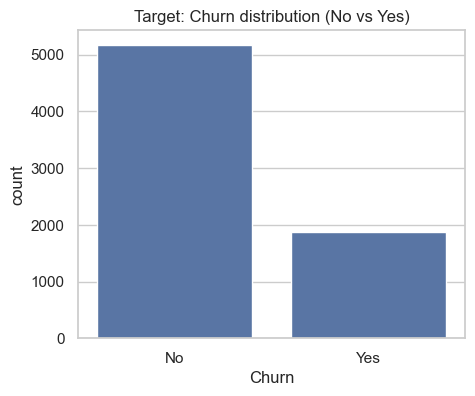

In [19]:
print("Churn counts:\n", df['Churn'].value_counts())
print("\nChurn percentage:")
display((df['Churn'].value_counts(normalize=True) * 100).round(2))

plt.figure(figsize=(5,4))
sns.countplot(x='Churn', data=df)
plt.title('Target: Churn distribution (No vs Yes)')
plt.show()

Clean copy for EDA

In [20]:
eda = df.copy()
if 'customerID' in eda.columns:
    eda = eda.drop(columns=['customerID'])

Numeric column list and summary

In [21]:
numeric_cols = eda.select_dtypes(include=['int64','float64']).columns.tolist()
print("Numeric columns:", numeric_cols)
display(eda[numeric_cols].describe().T)

Numeric columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.000,0.000,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.000,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.500,70.350,89.85,118.75
TotalCharges,7043.0,2281.916928,2265.270398,18.80,402.225,1397.475,3786.60,8684.80


Histograms for numeric features

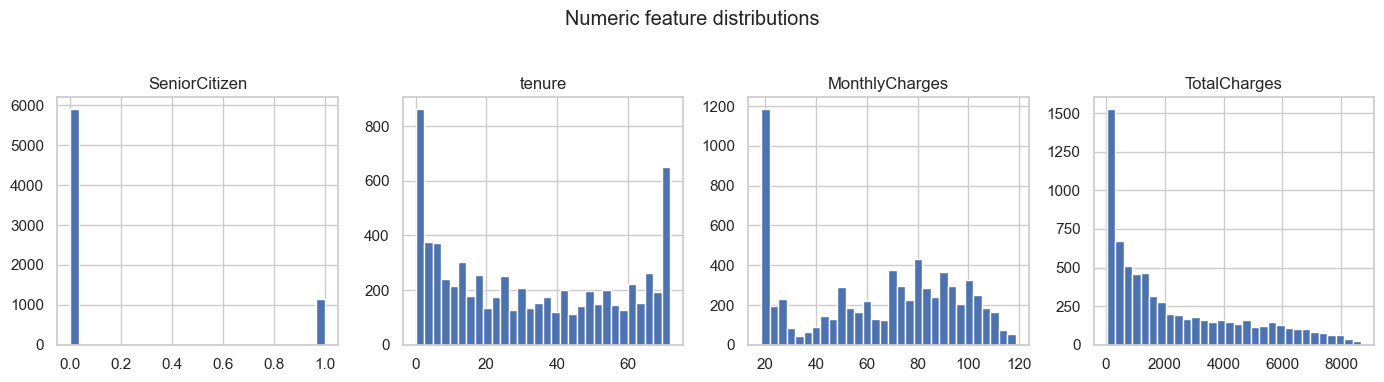

In [22]:
eda[numeric_cols].hist(bins=30, layout=(1, len(numeric_cols)), figsize=(14,4))
plt.suptitle("Numeric feature distributions")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Boxplots grouped by churn for numeric columns

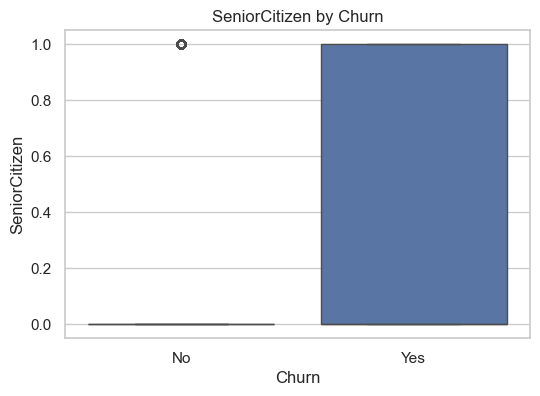

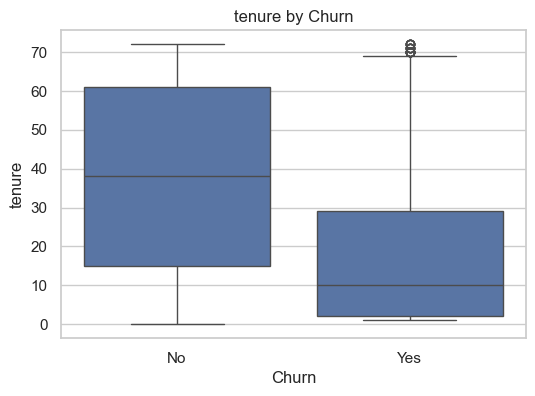

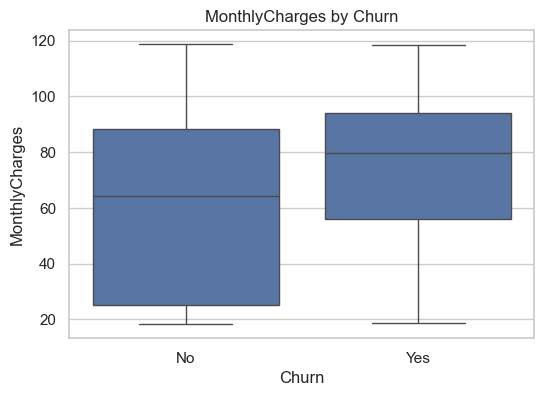

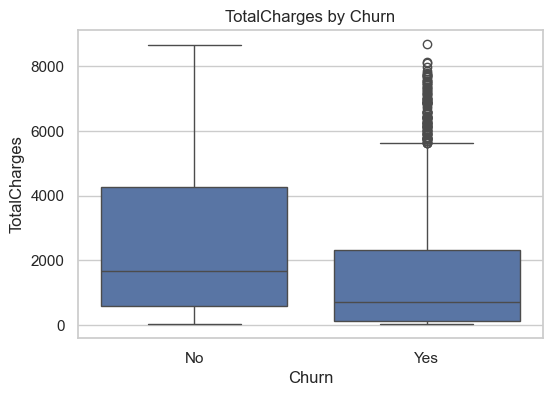

In [23]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Churn', y=col, data=eda)
    plt.title(f"{col} by Churn")
    plt.show()

Numeric-only correlation heatmap

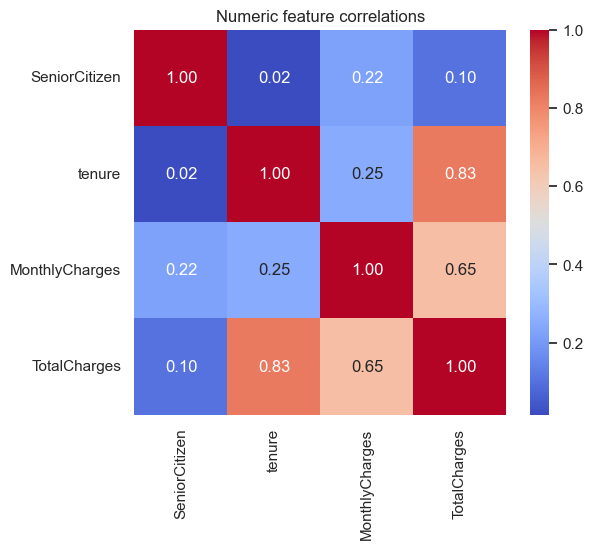

In [24]:
df_numeric = eda.select_dtypes(include=['int64','float64'])
corr = df_numeric.corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Numeric feature correlations")
plt.show()

Pairwise scatter examples

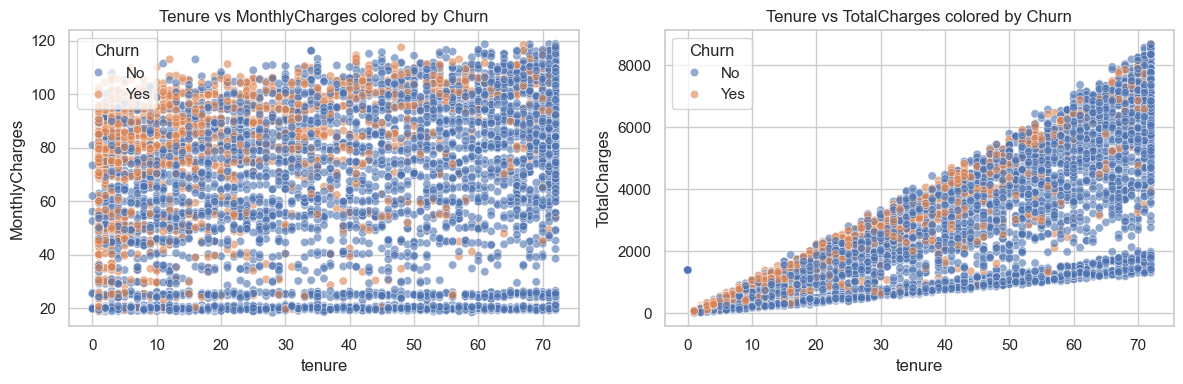

In [25]:
if {'tenure','MonthlyCharges'}.issubset(set(df_numeric.columns)):
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=eda, alpha=0.6)
    plt.title('Tenure vs MonthlyCharges colored by Churn')
    plt.subplot(1,2,2)
    if 'TotalCharges' in eda.columns:
        sns.scatterplot(x='tenure', y='TotalCharges', hue='Churn', data=eda, alpha=0.6)
        plt.title('Tenure vs TotalCharges colored by Churn')
    plt.tight_layout()
    plt.show()